# K-means clustering

1) Code K-means clustering 

2) Use sklearn K-means clustering

## 1) Code K-means clustering 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=1)

In [8]:
def colors(y):
    if y == 0:
        return "orange"
    elif y == 1:
        return "red"
    else:
        return "green"

c = [colors(label) for label in y]

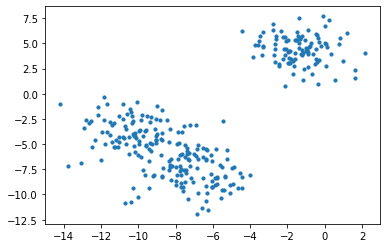

In [9]:
plt.scatter(X[:, 0], X[:, 1], s=10);

In [30]:
centroids = []
for k in range(3):
    i = np.random.randint(0, 300)
    point = (X[i, 0], X[i, 1], k)
    centroids.append(point)

In [31]:
centroids

[(-8.674328601725206, -7.41049018782357, 0),
 (-10.68513668541842, -10.819577668333025, 1),
 (-1.696485339762187, 3.243747440089422, 2)]

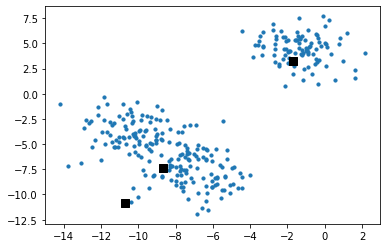

In [32]:
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.scatter([centroids[0][0]], [centroids[0][1]], color="black", s=50, marker="s")
plt.scatter([centroids[1][0]], [centroids[1][1]], color="black", s=50, marker="s")
plt.scatter([centroids[2][0]], [centroids[2][1]], color="black", s=50, marker="s");

In [33]:
def distance(i, X, centroid):
    return np.sqrt(sum((X[i, j] - centroid[j])**2 for j in range(2)))

In [34]:
def assign_label(i, X, centroids):
    distances = np.array([distance(i, X, centroid) for centroid in centroids])
    label = np.argmin(distances)
    return label 

In [35]:
def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

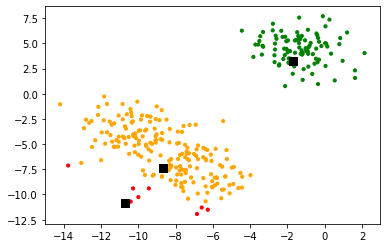

In [36]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

plt.scatter(X[:, 0], X[:, 1], c=current_colors, s=10)
plt.scatter([centroids[0][0]], [centroids[0][1]], color="black", s=50, marker="s")
plt.scatter([centroids[1][0]], [centroids[1][1]], color="black", s=50, marker="s")
plt.scatter([centroids[2][0]], [centroids[2][1]], color="black", s=50, marker="s");

In [37]:
{i : [0, 0] for i in range(3)}

{0: [0, 0], 1: [0, 0], 2: [0, 0]}

In [38]:
def update_centroids(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    centroid_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        centroid_means[current_labels[i]][0] += X[i, 0]
        centroid_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        centroid_means[i][0] = centroid_means[i][0]/num_occur
        centroid_means[i][1] = centroid_means[i][1]/num_occur
    
    return [(centroid_means[i][0], centroid_means[i][1]) for i in centroid_means]

In [39]:
new_centroids = update_centroids(X, centroids)

new_centroids

[(-8.543557254949116, -5.670072865249733),
 (-9.364084221943141, -10.269879500330351),
 (-1.3499550921214103, 4.408109576709623)]

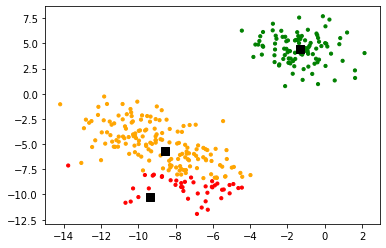

In [40]:
current_labels = assign_clusters(X, new_centroids)
current_colors = [colors(label) for label in current_labels]

plt.scatter(X[:, 0], X[:, 1], c=current_colors, s=10)
plt.scatter([new_centroids[0][0]], [new_centroids[0][1]], color="black", s=50, marker="s")
plt.scatter([new_centroids[1][0]], [new_centroids[1][1]], color="black", s=50, marker="s")
plt.scatter([new_centroids[2][0]], [new_centroids[2][1]], color="black", s=50, marker="s");

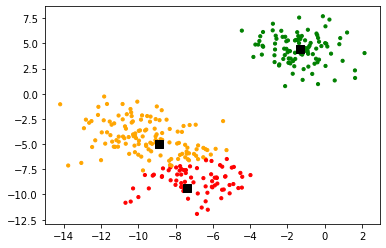

In [41]:
new_centroids = update_centroids(X, new_centroids)
current_labels = assign_clusters(X, new_centroids)
current_colors = [colors(label) for label in current_labels]

plt.scatter(X[:, 0], X[:, 1], c=current_colors, s=10)
plt.scatter([new_centroids[0][0]], [new_centroids[0][1]], color="black", s=50, marker="s")
plt.scatter([new_centroids[1][0]], [new_centroids[1][1]], color="black", s=50, marker="s")
plt.scatter([new_centroids[2][0]], [new_centroids[2][1]], color="black", s=50, marker="s");

In [42]:
def k_means_clustering(X, k, max_iter = 100):
    centroids = []
    for j in range(k):
        i = np.random.randint(0, 300)
        point = (X[i, 0], X[i, 1], j)
        centroids.append(point)
    
    for _ in range(max_iter):
        centroids = update_centroids(X, centroids)

    return centroids

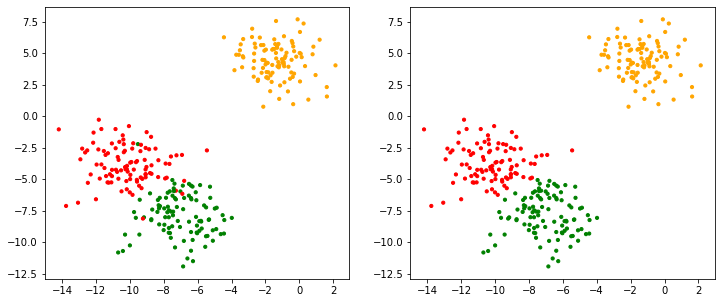

In [43]:
centroids = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:, 0], X[:, 1], c=c, s=10)

ax2.scatter(X[:, 0], X[:, 1], c=current_colors, s=10);

## 2) Use sklearn K-means clustering

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [49]:
df = pd.read_csv('shopping-data.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


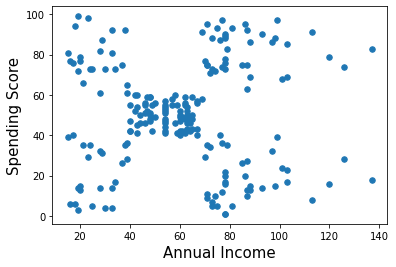

In [51]:
plt.scatter(df['Annual Income'], df['Spending Score'], s=30)
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Spending Score', fontsize=15);

In [52]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income']])
df['Annual Income'] = scaler.transform(df[['Annual Income']])

scaler.fit(df[['Spending Score']])
df['Spending Score'] = scaler.transform(df[['Spending Score']])

In [53]:
X = df[['Annual Income', 'Spending Score']]
X

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [54]:
km = KMeans(n_clusters=5)
km.fit(X)

KMeans(n_clusters=5)

In [55]:
cluster = km.predict(X)
cluster

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3,
       4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [56]:
df['Cluster'] = cluster
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,0.000000,0.387755,2
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,2
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,2
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,3
196,197,Female,45,0.909836,0.275510,1
197,198,Male,32,0.909836,0.744898,3
198,199,Male,32,1.000000,0.173469,1


In [57]:
km.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3,
       4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [58]:
km.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692]])

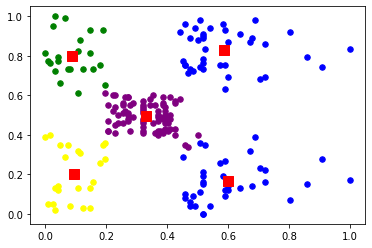

In [59]:
labels = [0, 1, 2, 3, 4]
colors = ["green", "blue", "yellow", "blue", "purple"]

for label, color in zip(labels, colors):
    index = df["Cluster"]==label
    plt.scatter(df.loc[index, "Annual Income"],
                df.loc[index, "Spending Score"],
                c = color,
                s=30)
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="red", marker="s", s=100);

In [60]:
km.inertia_

3.583117905952561

In [54]:
km.score(X)

-3.5831179059525606

In [55]:
km.transform(X)

# measures the distance from each instance to every centroid
# this can be used as a transformation from a high dimensional space to a lower dimensional space

array([[0.34729896, 0.20651464, 0.64021359, 0.73315494, 0.42115493],
       [0.46075083, 0.62009412, 0.88598372, 0.58649383, 0.08949986],
       [0.54858362, 0.17404226, 0.60257215, 0.96837169, 0.75284254],
       [0.4270669 , 0.57851472, 0.85067521, 0.58054729, 0.08329985],
       [0.32858722, 0.20916435, 0.6285951 , 0.71392026, 0.40799002],
       [0.41419099, 0.56726189, 0.83764368, 0.57340733, 0.07934302],
       [0.53912156, 0.16670396, 0.5864798 , 0.95867388, 0.75128322],
       [0.54724358, 0.74888516, 0.97293998, 0.57470326, 0.16222625],
       [0.56020755, 0.19234188, 0.5852123 , 0.97898444, 0.78116939],
       [0.37568371, 0.5247224 , 0.79711732, 0.56315831, 0.09320132],
       [0.46890391, 0.092524  , 0.56810262, 0.88867852, 0.66925139],
       [0.58604589, 0.79905188, 1.00990369, 0.57974626, 0.20782001],
       [0.45581614, 0.07944104, 0.55943255, 0.87559011, 0.65844743],
       [0.40291407, 0.57464404, 0.82820078, 0.54790183, 0.05277815],
       [0.47176432, 0.09586508, 0.

In [56]:
silhouette_samples(X, km.labels_)

array([ 0.33580108,  0.69473511,  0.63293448,  0.69123745,  0.2984495 ,
        0.69012557,  0.64026293,  0.6506099 ,  0.61925785,  0.64198051,
        0.66840951,  0.61039547,  0.66931342,  0.71048714,  0.67094677,
        0.71898933,  0.41979519,  0.4883633 ,  0.54272109,  0.61300382,
        0.39751963,  0.65956848,  0.63280583,  0.65459908,  0.65535602,
        0.70325269,  0.44169021,  0.19342169,  0.45505638,  0.68369556,
        0.59543314,  0.60403987,  0.5602012 ,  0.61353253,  0.61456446,
        0.65119975,  0.59288044,  0.53509558,  0.43065719,  0.51180251,
        0.05947421,  0.53277759, -0.04466494,  0.16772625,  0.32926751,
        0.03761109,  0.45215253,  0.50055572,  0.35136978,  0.35136978,
        0.57222956,  0.32844447,  0.55821474,  0.36011199,  0.53298812,
        0.40320704,  0.63977123,  0.57987703,  0.66886229,  0.62150424,
        0.57742035,  0.60215641,  0.67373044,  0.50442533,  0.70008932,
        0.52474556,  0.70700731,  0.68768234,  0.52474556,  0.67

In [57]:
silhouette_score(X, km.labels_)

0.5594854531227246

In [58]:
#import warnings
#warnings.filterwarnings("ignore")

#! pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


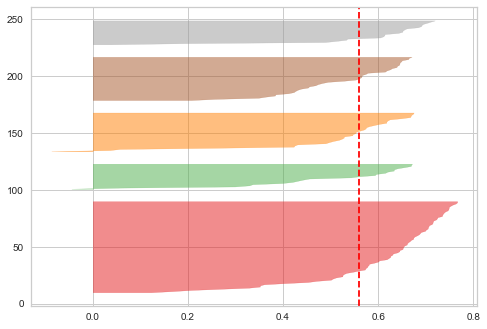

In [59]:
visualizer = SilhouetteVisualizer(km)
visualizer.fit(X);

In [60]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [61]:
inertia

[23.040720326039903,
 13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.1004341489924956,
 2.6260623772655105,
 2.2344196213747898,
 1.8834195765223645,
 1.6513444080300124,
 1.4483783167082152,
 1.2891015906021406,
 1.159072372227067,
 1.0717109904607756,
 0.9824273456881618]

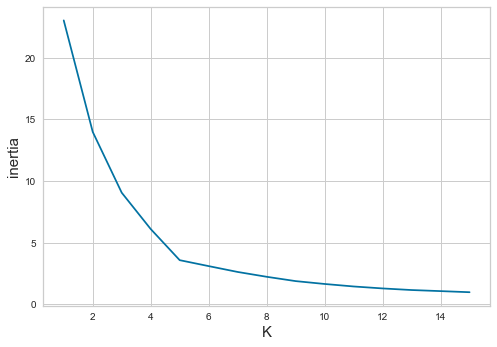

In [62]:
plt.plot(range(1,16), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

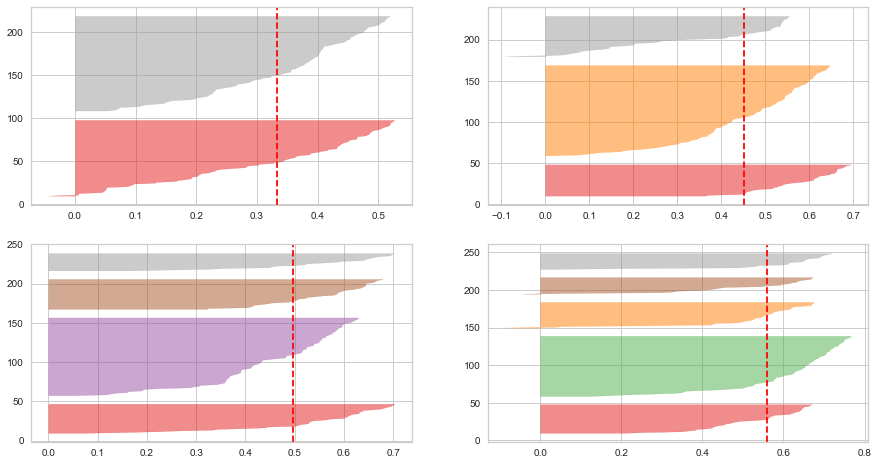

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X)

### COURSE EVALUATION